<a href="https://colab.research.google.com/github/santoshdhalwalkar/Telecommunication/blob/main/task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#import drive from google
from google.colab import drive

In [6]:
# mount the drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#import the liabaries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [8]:
 #read the data from google drive
df =pd.read_csv("/content/drive/MyDrive/cleanedtelecomunication_df.csv")
df.head()

,BearerId,MSISDNNumber,Calculated_Duration_Seconds,AvgRTT_DL,AvgRTT_UL,AvgBearerTP_DL,AvgBearerTP_UL,TCPDLRetransVol_Bytes,TCPULRetransVol_Bytes,GamingDL_Bytes,...,Total_Data,Total_DL,Total_UL,NetflixDL_Bytes,OtherUL_Bytes,OtherDL_Bytes,GamingUL_Bytes,Total_Data.1,Total_DL.1,Total_UL.1
0,1.311450e+19,3.368542e+10,2.434800e+08,45.0,5.0,28.0,41.0,568730.0,20949.5,519620584.0,...,599743023.0,556406594.0,43336429.0,7682779.0,3820483.0,318297673.0,2710989.0,599743023.0,556406594.0,43336429.0
1,1.311450e+19,3.366132e+10,2.365800e+08,46.0,7.0,46.0,46.0,568730.0,20949.5,715350506.0,...,798245704.0,757526492.0,40719212.0,11758420.0,1716480.0,290582586.0,10250922.0,798245704.0,757526492.0,40719212.0
2,1.311450e+19,3.361513e+10,2.317800e+08,45.0,5.0,23.0,51.0,568730.0,20949.5,124180544.0,...,192095344.0,139043208.0,53052136.0,753238.0,14932623.0,350039548.0,14967821.0,192095344.0,139043208.0,53052136.0
3,1.311450e+19,3.366495e+10,2.308200e+08,39.0,2.0,22.0,46.0,568730.0,20949.5,293492651.0,...,359872820.0,329159454.0,30713366.0,17917894.0,11684759.0,495376623.0,1362536.0,359872820.0,329159454.0,30713366.0
4,7.349880e+18,3.366403e+10,2.389200e+08,38.0,1.0,49.0,47.0,568730.0,20949.5,516508263.0,...,604428354.0,546747900.0,57680454.0,1114842.0,9207067.0,624397048.0,8432981.0,604428354.0,546747900.0,57680454.0


In [9]:
# Calculate Sessions Frequency by grouping by 'MSISDNNumber' and counting 'BearerId'
sessions_frequency = df.groupby('MSISDNNumber')['BearerId'].count().reset_index()

# Rename the column for clarity
sessions_frequency.columns = ['MSISDNNumber', 'session_frequency']

# Display the result
print(sessions_frequency)

       MSISDNNumber  session_frequency
0      3.360100e+10                  1
1      3.360100e+10                  1
2      3.360100e+10                  1
3      3.360101e+10                  1
4      3.360101e+10                  1
...             ...                ...
56662  3.378996e+10                  1
56663  3.378996e+10                  1
56664  3.378997e+10                  1
56665  3.378998e+10                  1
56666  3.379000e+10                  1

[56667 rows x 2 columns]


In [10]:
# Concatenate DataFrames
df = pd.concat([df, sessions_frequency],axis=1)

In [11]:
df

,BearerId,MSISDNNumber,Calculated_Duration_Seconds,AvgRTT_DL,AvgRTT_UL,AvgBearerTP_DL,AvgBearerTP_UL,TCPDLRetransVol_Bytes,TCPULRetransVol_Bytes,GamingDL_Bytes,...,Total_UL,NetflixDL_Bytes,OtherUL_Bytes,OtherDL_Bytes,GamingUL_Bytes,Total_Data.1,Total_DL.1,Total_UL.1,MSISDNNumber,session_frequency
0,1.311450e+19,3.368542e+10,2.434800e+08,45.0,5.0,28.0,41.0,568730.0,20949.5,519620584.0,...,43336429.0,7682779.00,3.820483e+06,318297673.0,2.710989e+06,599743023.0,556406594.0,43336429.0,3.360100e+10,1.0
1,1.311450e+19,3.366132e+10,2.365800e+08,46.0,7.0,46.0,46.0,568730.0,20949.5,715350506.0,...,40719212.0,11758420.00,1.716480e+06,290582586.0,1.025092e+07,798245704.0,757526492.0,40719212.0,3.360100e+10,1.0
2,1.311450e+19,3.361513e+10,2.317800e+08,45.0,5.0,23.0,51.0,568730.0,20949.5,124180544.0,...,53052136.0,753238.00,1.493262e+07,350039548.0,1.496782e+07,192095344.0,139043208.0,53052136.0,3.360100e+10,1.0
3,1.311450e+19,3.366495e+10,2.308200e+08,39.0,2.0,22.0,46.0,568730.0,20949.5,293492651.0,...,30713366.0,17917894.00,1.168476e+07,495376623.0,1.362536e+06,359872820.0,329159454.0,30713366.0,3.360101e+10,1.0
4,7.349880e+18,3.366403e+10,2.389200e+08,38.0,1.0,49.0,47.0,568730.0,20949.5,516508263.0,...,57680454.0,1114842.00,9.207067e+06,624397048.0,8.432981e+06,604428354.0,546747900.0,57680454.0,3.360101e+10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65566,7.349880e+18,3.362150e+10,9.294000e+07,26.0,2.0,41.0,44.0,568730.0,20949.5,612360045.0,...,39581975.0,5803244.00,2.334997e+06,694590676.0,3.466574e+06,678154314.0,638572339.0,39581975.0,NaN,NaN
65567,7.349880e+18,3.362647e+10,8.874000e+07,29.0,2.0,47.0,47.0,568730.0,20949.5,163989531.0,...,24587307.0,17156072.00,4.918463e+06,821308206.0,4.992196e+06,222563460.0,197976153.0,24587307.0,NaN,NaN
65568,7.349880e+18,3.361957e+10,8.274000e+07,45.0,5.0,65.0,61.0,568730.0,20949.5,781632345.0,...,44038913.0,18752564.00,1.082820e+07,47444070.0,4.811422e+06,873872323.0,829833410.0,44038913.0,NaN,NaN
65569,1.311450e+19,3.361962e+10,9.792000e+07,37.0,5.0,34.0,37.0,568730.0,20949.5,352536971.0,...,29626096.0,3322253.00,1.406930e+06,814713113.0,2.529475e+06,401522016.0,371895920.0,29626096.0,NaN,NaN


In [12]:
df = df.T.drop_duplicates().T


In [13]:
# Drop the duplicate column
df = df.loc[:, ~df.columns.duplicated()]

# Drop rows where 'MSISDNNumber1' has NaN values
df = df.dropna(subset=['MSISDNNumber'])

# Display the cleaned DataFrame

In [14]:
# Calculate the median of the 'session_frequency' column
median_session_frequency = df['session_frequency'].median()

# Fill NaN values in the 'session_frequency' column with the median
df['session_frequency'].fillna(median_session_frequency, inplace=True)

# Display the DataFrame after filling NaN values
df

,BearerId,MSISDNNumber,Calculated_Duration_Seconds,AvgRTT_DL,AvgRTT_UL,AvgBearerTP_DL,AvgBearerTP_UL,TCPDLRetransVol_Bytes,TCPULRetransVol_Bytes,GamingDL_Bytes,...,YoutubeDL_Bytes,NetflixUL_Bytes,Total_Data,Total_DL,Total_UL,NetflixDL_Bytes,OtherUL_Bytes,OtherDL_Bytes,GamingUL_Bytes,session_frequency
0,1.311450e+19,3.368542e+10,2.434800e+08,45.0,5.0,28.0,41.0,568730.0,20949.5,519620584.0,...,17400892.0,20806551.00,599743023.0,556406594.0,43336429.0,7682779.00,3.820483e+06,318297673.0,2.710989e+06,1.0
1,1.311450e+19,3.366132e+10,2.365800e+08,46.0,7.0,46.0,46.0,568730.0,20949.5,715350506.0,...,19431593.0,9907089.00,798245704.0,757526492.0,40719212.0,11758420.00,1.716480e+06,290582586.0,1.025092e+07,1.0
2,1.311450e+19,3.361513e+10,2.317800e+08,45.0,5.0,23.0,51.0,568730.0,20949.5,124180544.0,...,7438887.0,9887128.00,192095344.0,139043208.0,53052136.0,753238.00,1.493262e+07,350039548.0,1.496782e+07,1.0
3,1.311450e+19,3.366495e+10,2.308200e+08,39.0,2.0,22.0,46.0,568730.0,20949.5,293492651.0,...,3334865.0,1530332.00,359872820.0,329159454.0,30713366.0,17917894.00,1.168476e+07,495376623.0,1.362536e+06,1.0
4,7.349880e+18,3.366403e+10,2.389200e+08,38.0,1.0,49.0,47.0,568730.0,20949.5,516508263.0,...,23039020.0,13958301.00,604428354.0,546747900.0,57680454.0,1114842.00,9.207067e+06,624397048.0,8.432981e+06,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65566,7.349880e+18,3.362150e+10,9.294000e+07,26.0,2.0,41.0,44.0,568730.0,20949.5,612360045.0,...,6304791.0,20675907.00,678154314.0,638572339.0,39581975.0,5803244.00,2.334997e+06,694590676.0,3.466574e+06,1.0
65567,7.349880e+18,3.362647e+10,8.874000e+07,29.0,2.0,47.0,47.0,568730.0,20949.5,163989531.0,...,6400193.0,6819538.00,222563460.0,197976153.0,24587307.0,17156072.00,4.918463e+06,821308206.0,4.992196e+06,1.0
65568,7.349880e+18,3.361957e+10,8.274000e+07,45.0,5.0,65.0,61.0,568730.0,20949.5,781632345.0,...,22613630.0,15464894.00,873872323.0,829833410.0,44038913.0,18752564.00,1.082820e+07,47444070.0,4.811422e+06,1.0
65569,1.311450e+19,3.361962e+10,9.792000e+07,37.0,5.0,34.0,37.0,568730.0,20949.5,352536971.0,...,8817106.0,13172589.00,401522016.0,371895920.0,29626096.0,3322253.00,1.406930e+06,814713113.0,2.529475e+06,1.0


In [15]:
from scipy.spatial.distance import euclidean

# Select the relevant columns used in clustering
features = df[['session_frequency', 'Calculated_Duration_Seconds', 'Total_Data']]

# Check for NaNs or Infs and handle them (e.g., fill with 0 or drop)
features.replace([np.inf, -np.inf], np.nan, inplace=True)
features.fillna(0, inplace=True)  # Alternatively, you can use features.dropna(inplace=True)

# Define the centroid of the less engaged cluster (cluster 1)
less_engaged_centroid = [0.002972, 0.093462, 0.068495]

# Calculate the Euclidean distance for each user from the less engaged cluster centroid
df['engagement_score'] = features.apply(lambda row: euclidean(row, less_engaged_centroid), axis=1)

# Save the result with engagement scores
output_file_path = '/content/drive/MyDrive/cengagement_scores_simple.csv'
df.to_csv(output_file_path, index=False)

# Output the file path
print("Engagement scores have been saved to:", output_file_path)

Engagement scores have been saved to: /content/drive/MyDrive/cengagement_scores_simple.csv


In [16]:
# Load the CSV file with engagement scores
engagement_scores = pd.read_csv('/content/drive/MyDrive/cengagement_scores_simple.csv')



In [17]:
engagement_scores

,BearerId,MSISDNNumber,Calculated_Duration_Seconds,AvgRTT_DL,AvgRTT_UL,AvgBearerTP_DL,AvgBearerTP_UL,TCPDLRetransVol_Bytes,TCPULRetransVol_Bytes,GamingDL_Bytes,...,NetflixUL_Bytes,Total_Data,Total_DL,Total_UL,NetflixDL_Bytes,OtherUL_Bytes,OtherDL_Bytes,GamingUL_Bytes,session_frequency,engagement_score
0,1.311450e+19,3.368542e+10,2.434800e+08,45.0,5.0,28.0,41.0,568730.0,20949.5,519620584.0,...,20806551.00,599743023.0,556406594.0,43336429.0,7682779.00,3.820483e+06,318297673.0,2.710989e+06,1.0,6.472822e+08
1,1.311450e+19,3.366132e+10,2.365800e+08,46.0,7.0,46.0,46.0,568730.0,20949.5,715350506.0,...,9907089.00,798245704.0,757526492.0,40719212.0,11758420.00,1.716480e+06,290582586.0,1.025092e+07,1.0,8.325661e+08
2,1.311450e+19,3.361513e+10,2.317800e+08,45.0,5.0,23.0,51.0,568730.0,20949.5,124180544.0,...,9887128.00,192095344.0,139043208.0,53052136.0,753238.00,1.493262e+07,350039548.0,1.496782e+07,1.0,3.010359e+08
3,1.311450e+19,3.366495e+10,2.308200e+08,39.0,2.0,22.0,46.0,568730.0,20949.5,293492651.0,...,1530332.00,359872820.0,329159454.0,30713366.0,17917894.00,1.168476e+07,495376623.0,1.362536e+06,1.0,4.275352e+08
4,7.349880e+18,3.366403e+10,2.389200e+08,38.0,1.0,49.0,47.0,568730.0,20949.5,516508263.0,...,13958301.00,604428354.0,546747900.0,57680454.0,1114842.00,9.207067e+06,624397048.0,8.432981e+06,1.0,6.499357e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65566,7.349880e+18,3.362150e+10,9.294000e+07,26.0,2.0,41.0,44.0,568730.0,20949.5,612360045.0,...,20675907.00,678154314.0,638572339.0,39581975.0,5803244.00,2.334997e+06,694590676.0,3.466574e+06,1.0,6.844933e+08
65567,7.349880e+18,3.362647e+10,8.874000e+07,29.0,2.0,47.0,47.0,568730.0,20949.5,163989531.0,...,6819538.00,222563460.0,197976153.0,24587307.0,17156072.00,4.918463e+06,821308206.0,4.992196e+06,1.0,2.396023e+08
65568,7.349880e+18,3.361957e+10,8.274000e+07,45.0,5.0,65.0,61.0,568730.0,20949.5,781632345.0,...,15464894.00,873872323.0,829833410.0,44038913.0,18752564.00,1.082820e+07,47444070.0,4.811422e+06,1.0,8.777806e+08
65569,1.311450e+19,3.361962e+10,9.792000e+07,37.0,5.0,34.0,37.0,568730.0,20949.5,352536971.0,...,13172589.00,401522016.0,371895920.0,29626096.0,3322253.00,1.406930e+06,814713113.0,2.529475e+06,1.0,4.132896e+08


In [46]:
# Calculate the centroid for the worst experience cluster (maximum values)
worst_experience_centroid = engagement_scores.max()

# Compute the Euclidean distance from each user to the worst experience cluster
experience_scores = np.linalg.norm(engagement_scores - worst_experience_centroid, axis=1)

# Add the experience scores to the DataFrame
engagement_scores['Experience_Score'] = experience_scores

In [60]:
engagement_scores.head()

,BearerId,MSISDNNumber,Calculated_Duration_Seconds,AvgRTT_DL,AvgRTT_UL,AvgBearerTP_DL,AvgBearerTP_UL,TCPDLRetransVol_Bytes,TCPULRetransVol_Bytes,GamingDL_Bytes,...,Total_DL,Total_UL,NetflixDL_Bytes,OtherUL_Bytes,OtherDL_Bytes,GamingUL_Bytes,session_frequency,engagement_score,Experience_Score,Satisfaction_Score
0,1.311450e+19,3.368542e+10,2.434800e+08,45.0,5.0,28.0,41.0,568730.0,20949.5,519620584.0,...,556406594.0,43336429.0,7682779.0,3820483.0,318297673.0,2710989.0,1.0,6.472822e+08,6.928786e+18,3.464393e+18
1,1.311450e+19,3.366132e+10,2.365800e+08,46.0,7.0,46.0,46.0,568730.0,20949.5,715350506.0,...,757526492.0,40719212.0,11758420.0,1716480.0,290582586.0,10250922.0,1.0,8.325661e+08,6.928786e+18,3.464393e+18
2,1.311450e+19,3.361513e+10,2.317800e+08,45.0,5.0,23.0,51.0,568730.0,20949.5,124180544.0,...,139043208.0,53052136.0,753238.0,14932623.0,350039548.0,14967821.0,1.0,3.010359e+08,6.928786e+18,3.464393e+18
3,1.311450e+19,3.366495e+10,2.308200e+08,39.0,2.0,22.0,46.0,568730.0,20949.5,293492651.0,...,329159454.0,30713366.0,17917894.0,11684759.0,495376623.0,1362536.0,1.0,4.275352e+08,6.928786e+18,3.464393e+18
4,7.349880e+18,3.366403e+10,2.389200e+08,38.0,1.0,49.0,47.0,568730.0,20949.5,516508263.0,...,546747900.0,57680454.0,1114842.0,9207067.0,624397048.0,8432981.0,1.0,6.499357e+08,5.856601e+18,2.928301e+18


In [48]:
# Calculate the Satisfaction Score as the average of engagement and experience scores
engagement_scores['Satisfaction_Score'] = engagement_scores[['engagement_score', 'Experience_Score']].mean(axis=1)

# Sort the DataFrame by Satisfaction Score in descending order to get the top 10 satisfied customers
top_10_satisfied_customers = engagement_scores.nlargest(10, 'Satisfaction_Score')



In [73]:
engagement_scores

,BearerId,MSISDNNumber,Calculated_Duration_Seconds,AvgRTT_DL,AvgRTT_UL,AvgBearerTP_DL,AvgBearerTP_UL,TCPDLRetransVol_Bytes,TCPULRetransVol_Bytes,GamingDL_Bytes,...,Total_UL,NetflixDL_Bytes,OtherUL_Bytes,OtherDL_Bytes,GamingUL_Bytes,session_frequency,engagement_score,Experience_Score,Satisfaction_Score,Cluster
0,1.311450e+19,3.368542e+10,2.434800e+08,45.0,5.0,28.0,41.0,568730.0,20949.5,519620584.0,...,43336429.0,7682779.00,3.820483e+06,318297673.0,2.710989e+06,1.0,6.472822e+08,6.928786e+18,3.464393e+18,1
1,1.311450e+19,3.366132e+10,2.365800e+08,46.0,7.0,46.0,46.0,568730.0,20949.5,715350506.0,...,40719212.0,11758420.00,1.716480e+06,290582586.0,1.025092e+07,1.0,8.325661e+08,6.928786e+18,3.464393e+18,1
2,1.311450e+19,3.361513e+10,2.317800e+08,45.0,5.0,23.0,51.0,568730.0,20949.5,124180544.0,...,53052136.0,753238.00,1.493262e+07,350039548.0,1.496782e+07,1.0,3.010359e+08,6.928786e+18,3.464393e+18,1
3,1.311450e+19,3.366495e+10,2.308200e+08,39.0,2.0,22.0,46.0,568730.0,20949.5,293492651.0,...,30713366.0,17917894.00,1.168476e+07,495376623.0,1.362536e+06,1.0,4.275352e+08,6.928786e+18,3.464393e+18,1
4,7.349880e+18,3.366403e+10,2.389200e+08,38.0,1.0,49.0,47.0,568730.0,20949.5,516508263.0,...,57680454.0,1114842.00,9.207067e+06,624397048.0,8.432981e+06,1.0,6.499357e+08,5.856601e+18,2.928301e+18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65566,7.349880e+18,3.362150e+10,9.294000e+07,26.0,2.0,41.0,44.0,568730.0,20949.5,612360045.0,...,39581975.0,5803244.00,2.334997e+06,694590676.0,3.466574e+06,1.0,6.844933e+08,5.856601e+18,2.928301e+18,0
65567,7.349880e+18,3.362647e+10,8.874000e+07,29.0,2.0,47.0,47.0,568730.0,20949.5,163989531.0,...,24587307.0,17156072.00,4.918463e+06,821308206.0,4.992196e+06,1.0,2.396023e+08,5.856601e+18,2.928301e+18,0
65568,7.349880e+18,3.361957e+10,8.274000e+07,45.0,5.0,65.0,61.0,568730.0,20949.5,781632345.0,...,44038913.0,18752564.00,1.082820e+07,47444070.0,4.811422e+06,1.0,8.777806e+08,5.856601e+18,2.928301e+18,0
65569,1.311450e+19,3.361962e+10,9.792000e+07,37.0,5.0,34.0,37.0,568730.0,20949.5,352536971.0,...,29626096.0,3322253.00,1.406930e+06,814713113.0,2.529475e+06,1.0,4.132896e+08,6.928786e+18,3.464393e+18,1


In [50]:
# Select and display the relevant columns
df_top_10_satisfied_customers = top_10_satisfied_customers[['MSISDNNumber', 'BearerId', 'Satisfaction_Score']]
df_top_10_satisfied_customers

,MSISDNNumber,BearerId,Satisfaction_Score
6502,3.378846e+10,1.318650e+19,3.504455e+18
5373,3.362420e+10,1.318650e+19,3.504455e+18
7712,3.366272e+10,1.318650e+19,3.504455e+18
21242,3.365869e+10,1.318650e+19,3.504455e+18
47528,3.360852e+10,1.318650e+19,3.504455e+18
47011,3.365114e+10,1.318650e+19,3.504455e+18
5339,3.366635e+10,1.318650e+19,3.504455e+18
42998,3.360969e+10,1.318650e+19,3.504455e+18
33539,3.369801e+10,1.318650e+19,3.504455e+18
10961,3.364346e+10,1.318650e+19,3.504455e+18


##Build a regression model

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

#### Define features (X) and target (y)

In [52]:
X = engagement_scores.drop(["Satisfaction_Score"], axis =1 )
y = engagement_scores["Satisfaction_Score"]

#### Split the data into training and testing sets

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
from sklearn.model_selection import cross_val_score
models = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score', 'RMSE (Cross-Validation) '])

In [42]:

# Function to calculate RMSE using cross-validation
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)).mean()
    return rmse

# Function to evaluate the model
def evaluation(y, y_pred):
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2_square = r2_score(y, y_pred)
    return mae, mse, rmse, r2_square

In [58]:
# Define the regressors
Regressors = [
    ('Ridge', Ridge()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor())
]

In [59]:

# DataFrame to store all results
all_results = pd.DataFrame({"Actual": y_test})

# DataFrame to store evaluation metrics
metrics_results = []

# Dictionary to store RMSE (CV) results
rmse_cv_results = {}

# Iterate through each regressor, fit the model, make predictions, and evaluate
for name, model in Regressors:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Add predictions to the DataFrame
    all_results[name + ' Predictions'] = y_pred


        # Evaluate the model
    # Evaluate the model
    mae, mse, rmse, r2_square = evaluation(y_test, y_pred)
    rmse_cv_val = rmse_cv(model)
    rmse_cv_results[name] = rmse_cv_val

    print(f"{name} Results:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2_square:.2f}")
    print(f"RMSE (CV): {rmse_cv_val:.2f}")
    print("\n")

print("Combined Results:")
print(all_results)

Ridge Results:
MAE: 32477728822358.32
MSE: 8937750487119468401461821440.00
RMSE: 94539676787682.47
R² Score: 1.00
RMSE (CV): 110846658992736.53


Decision Tree Results:
MAE: 4768023084750.32
MSE: 298145832710073233160806596608.00
RMSE: 546027318648136.19
R² Score: 1.00
RMSE (CV): 103575729.27


Random Forest Results:
MAE: 4768022561535.94
MSE: 298145832595693906049594556416.00
RMSE: 546027318543398.44
R² Score: 1.00
RMSE (CV): 102560122.53


Gradient Boosting Results:
MAE: 11797657902456.30
MSE: 298343167691240383711063048192.00
RMSE: 546207989406270.38
R² Score: 1.00
RMSE (CV): 7054025426881.78


Combined Results:
             Actual  Ridge Predictions  Decision Tree Predictions  \
43991  2.928301e+18       2.928320e+18               2.928301e+18   
64302  2.961192e+18       2.960973e+18               2.961192e+18   
17298  3.464393e+18       3.464372e+18               3.464393e+18   
47875  2.928301e+18       2.928309e+18               2.928301e+18   
51077  2.928301e+18       2.9283

Text(0.5, 1.0, 'RMSE of Models using Cross-Validation')

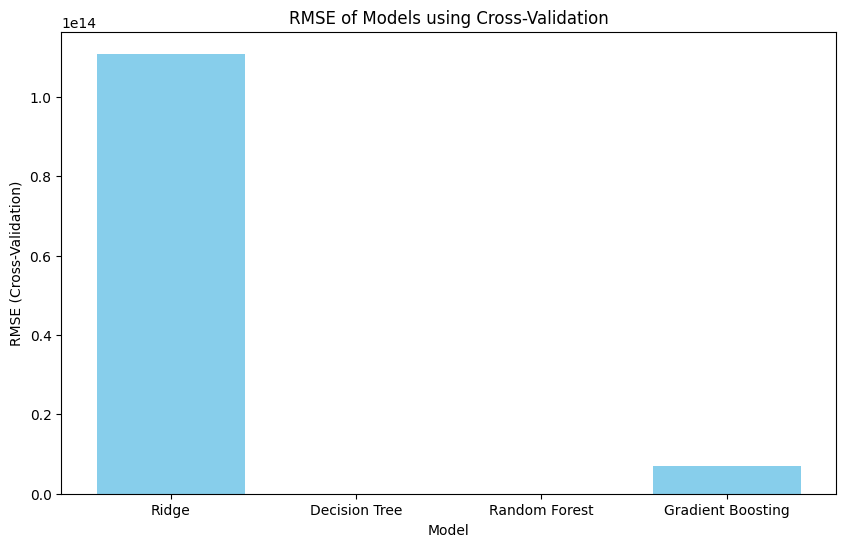

In [61]:
# Plot RMSE (CV) results
models = list(rmse_cv_results.keys())
rmse_values = list(rmse_cv_results.values())

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('RMSE (Cross-Validation)')
plt.title('RMSE of Models using Cross-Validation')

###Given the results, Random Forest seems to be the best model among the four options. Although all models show signs of overfitting with perfect R² scores and high error metrics, Random Forest has the lowest RMSE (CV), suggesting it generalizes slightly better on unseen data compared to the other models.

##Run a k-means (k=2) on the engagement & the experience score.

In [66]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

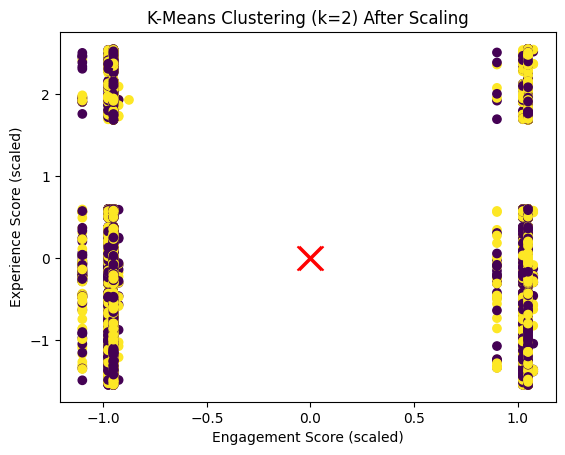

In [75]:
# Selecting the relevant columns
scluster = engagement_scores[['engagement_score', 'Experience_Score']]

# Step 1: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Run k-means with k=2 on the scaled data
kmeans = KMeans(n_clusters=2, random_state=0)
engagement_scores['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 3: Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=engagement_scores['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')  # cluster centers
plt.xlabel('Engagement Score (scaled)')
plt.ylabel('Experience Score (scaled)')
plt.title('K-Means Clustering (k=2) After Scaling')
plt.show()

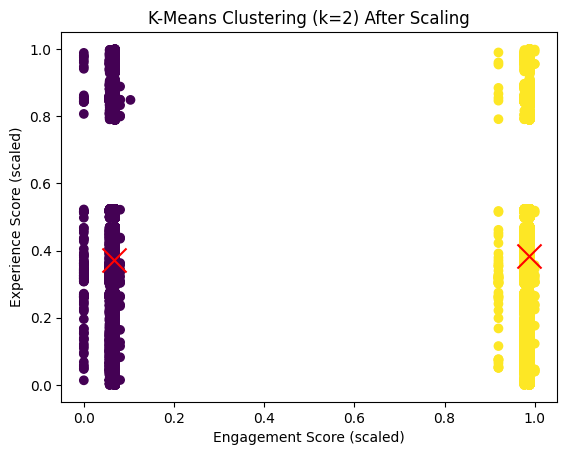

In [76]:
from sklearn.preprocessing import MinMaxScaler

# Selecting the relevant columns
scluster = engagement_scores[['engagement_score', 'Experience_Score']]

# Scaling the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Run k-means with k=2 on the scaled data
kmeans = KMeans(n_clusters=2, random_state=42)
engagement_scores['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 3: Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=engagement_scores['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')  # cluster centers
plt.xlabel('Engagement Score (scaled)')
plt.ylabel('Experience Score (scaled)')
plt.title('K-Means Clustering (k=2) After Scaling')
plt.show()




In [80]:
# Aggregating the average satisfaction & experience score per cluster
average_scores = engagement_scores.groupby('Cluster')[['Satisfaction_Score', 'Experience_Score']].mean()

average_scores

,Satisfaction_Score,Experience_Score
Cluster,,
0,2.931382e+18,5.862764e+18
1,3.462022e+18,6.924044e+18




1.   Cluster 0 appears to be associated with users who are both highly satisfied and have a high experience score.

2.  Cluster 1 might represent users who are relatively satisfied but have a much lower experience score.

